In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.xception import Xception
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from IPython.display import Image, display
import matplotlib.cm as cm

In [ ]:
image_size=(300, 300)
image_input=(300, 300, 3)
BATCH_SIZE=32

In [ ]:
!cp "/content/drive/MyDrive/Colab Notebooks/Deep Learning - Final Project/main_dataset.zip" .
!unzip main_dataset.zip

In [ ]:
image_generator = keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255.,
    rotation_range=45,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.3,    
)

In [ ]:
training_set = image_generator.flow_from_directory(
    "/content/dataset",
    target_size=image_size,
    batch_size=BATCH_SIZE,
    subset='training',
    shuffle=True
)

validation_set = image_generator.flow_from_directory(
    "/content/dataset",
    target_size=image_size,
    batch_size=BATCH_SIZE,
    subset='validation',
    shuffle=True
)


Found 19779 images belonging to 3 classes.
Found 8475 images belonging to 3 classes.


[0. 1. 0.]


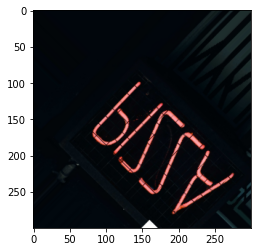

[0. 0. 1.]


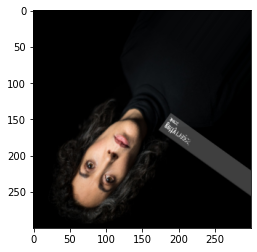

[1. 0. 0.]


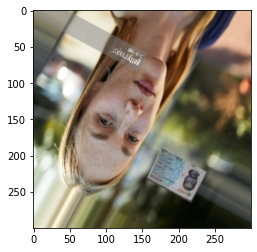

[0. 1. 0.]


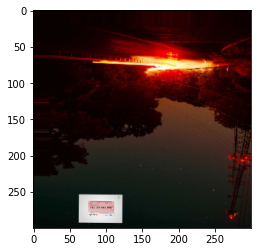

[0. 1. 0.]


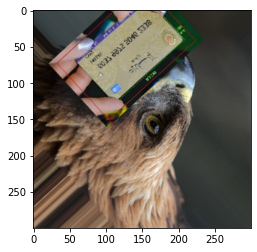

[0. 1. 0.]


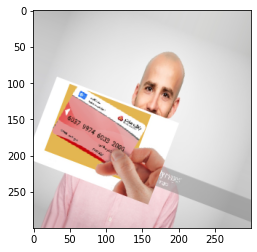

[1. 0. 0.]


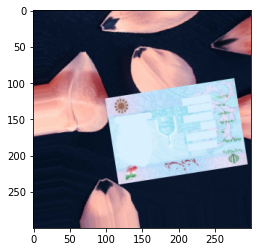

[1. 0. 0.]


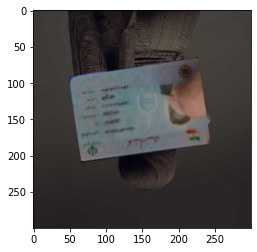

[0. 1. 0.]


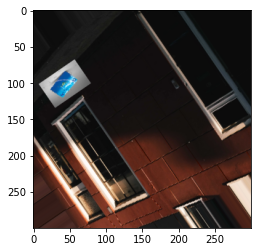

[1. 0. 0.]


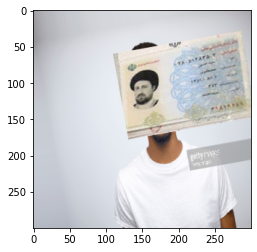

In [ ]:
c = 0
for batch, outputs in training_set:
    print(outputs[0])
    plt.imshow(batch[0])
    plt.show()

    c += 1
    if c== 10:
        break

In [ ]:
conv_base = Xception(
    include_top=False,
    weights='imagenet',
    input_shape=image_input,
    pooling='avg'
)

conv_base.summary()

83697664/83683744 [==============================] - 0s 0us/step
Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 300, 300, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
__________________________

In [ ]:
model = keras.Sequential()

model.add(keras.layers.InputLayer(input_shape=image_input))
model.add(conv_base)
model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(units=3, activation="sigmoid"))

model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

conv_base.trainable = False

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper_1 (ModuleWrap (None, 2048)              20861480  
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 6147      
Total params: 20,867,627
Trainable params: 6,147
Non-trainable params: 20,861,480
_________________________________________________________________


In [ ]:
history = model.fit(
    training_set,
    validation_data=validation_set,
    epochs=5,
)

Epoch 1/5
619/619 [==============================] - 956s 2s/step - loss: 0.5136 - accuracy: 0.7700 - val_loss: 0.5997 - val_accuracy: 0.6956
Epoch 2/5
619/619 [==============================] - 943s 2s/step - loss: 0.4291 - accuracy: 0.8174 - val_loss: 0.6073 - val_accuracy: 0.7018
Epoch 3/5
619/619 [==============================] - 929s 2s/step - loss: 0.4282 - accuracy: 0.8124 - val_loss: 0.6163 - val_accuracy: 0.7056
Epoch 4/5
619/619 [==============================] - 858s 1s/step - loss: 0.4144 - accuracy: 0.8200 - val_loss: 0.6345 - val_accuracy: 0.6931
Epoch 5/5
619/619 [==============================] - 859s 1s/step - loss: 0.4173 - accuracy: 0.8174 - val_loss: 0.6359 - val_accuracy: 0.6956


In [ ]:
conv_base.trainable = True

In [ ]:
for layer in conv_base.layers:
    if layer.name[0:7] == 'block14' or layer.name[0:7] == 'block13': 
        layer.trainable = True
    else:
        layer.trainable = False



In [ ]:
model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper_1 (ModuleWrap (None, 2048)              20861480  
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 6147      
Total params: 20,867,627
Trainable params: 6,047,011
Non-trainable params: 14,820,616
_________________________________________________________________


In [ ]:
history = model.fit(
    training_set,
    validation_data=validation_set,
    epochs=5,
)

Epoch 1/5
619/619 [==============================] - 909s 1s/step - loss: 0.0791 - accuracy: 0.9718 - val_loss: 0.0985 - val_accuracy: 0.9777
Epoch 2/5
619/619 [==============================] - 880s 1s/step - loss: 0.0396 - accuracy: 0.9865 - val_loss: 0.0408 - val_accuracy: 0.9881
Epoch 3/5
619/619 [==============================] - 877s 1s/step - loss: 0.0306 - accuracy: 0.9889 - val_loss: 0.0390 - val_accuracy: 0.9884
Epoch 4/5
619/619 [==============================] - 882s 1s/step - loss: 0.0389 - accuracy: 0.9882 - val_loss: 0.0330 - val_accuracy: 0.9890
Epoch 5/5
619/619 [==============================] - 874s 1s/step - loss: 0.0233 - accuracy: 0.9917 - val_loss: 0.1046 - val_accuracy: 0.9847


In [ ]:
def get_img_array(img_path, size):
    # `img` is a PIL image of size 299x299
    img = keras.preprocessing.image.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array

In [ ]:

def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

In [ ]:
def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))



In [ ]:
def display_gradcam(image_path, last_conv_layer_name):
  # Prepare image
  img_array = get_img_array(img_path, size=image_size) / 255.

  # Make model  # Remove last layer's softmax
  # model.layers[-1].activation = None

  # Print what the top predicted class is
  preds = model.predict(img_array)
  print("Predicted:", preds)

  # Generate class activation heatmap
  heatmap = make_gradcam_heatmap(img_array, conv_base, last_conv_layer_name)

  # Display heatmap
  plt.matshow(heatmap)
  plt.show()

  save_and_display_gradcam(img_path, heatmap)

In [ ]:
selected_conv = [
  "block14_sepconv2_act",
  "block13_sepconv2_act",
  "block12_sepconv2_act",
  "block11_sepconv2_act",
  "block10_sepconv2_act",
  "block9_sepconv2_act",
  "block8_sepconv2_act",
  "block7_sepconv2_act",
  "block6_sepconv2_act",
  "block5_sepconv2_act",
  "block4_sepconv2_act",
  "block3_sepconv2_act"
]
last_conv_layer_name = 'block14_sepconv2_act'

In [ ]:
def display_gradcam_multiple(img_path, selected_conv):
  for i in selected_conv:
      
    img_array = get_img_array(img_path, size=image_size) / 255.

    # Generate class activation heatmap
    heatmap = make_gradcam_heatmap(img_array, conv_base, i)

    # Display heatmap
    plt.matshow(heatmap)
    plt.show()

    save_and_display_gradcam(img_path, heatmap)

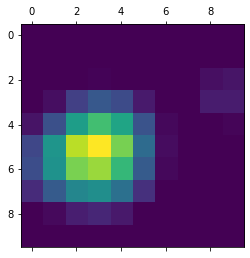

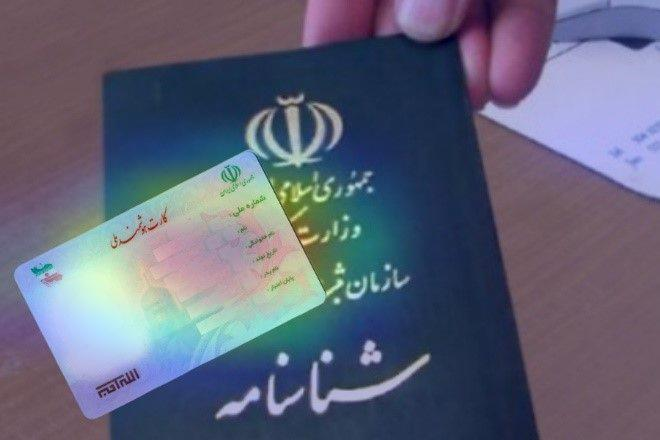

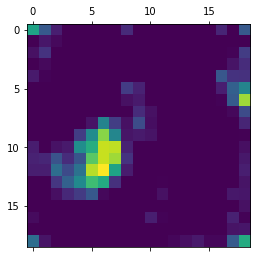

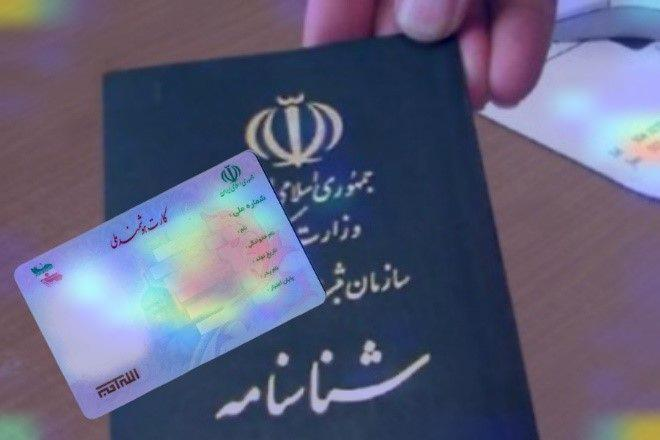

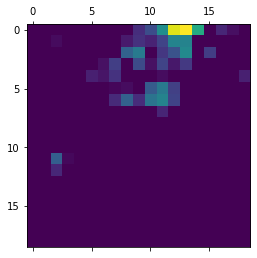

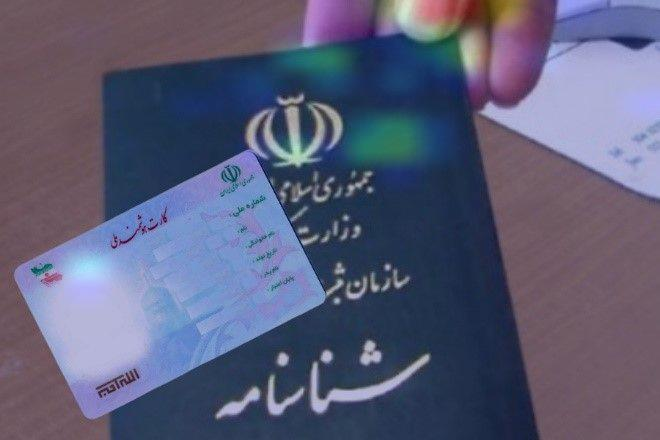

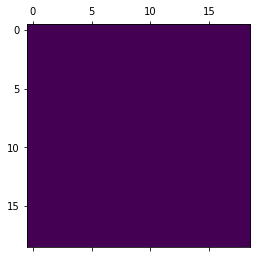

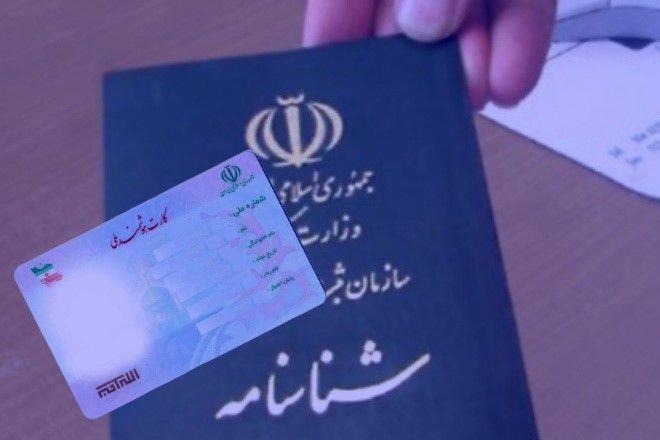

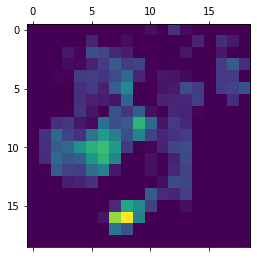

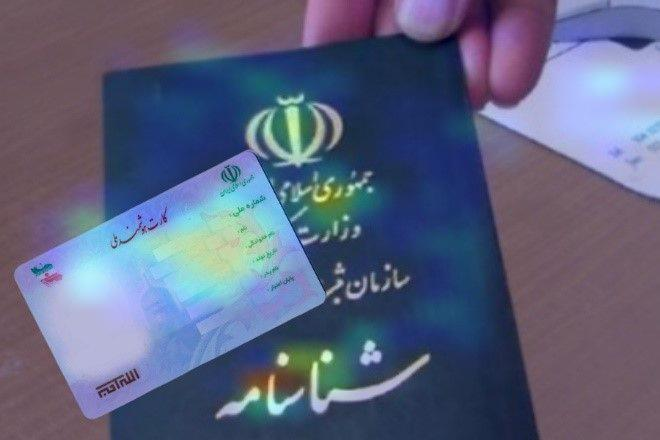

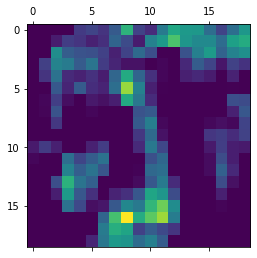

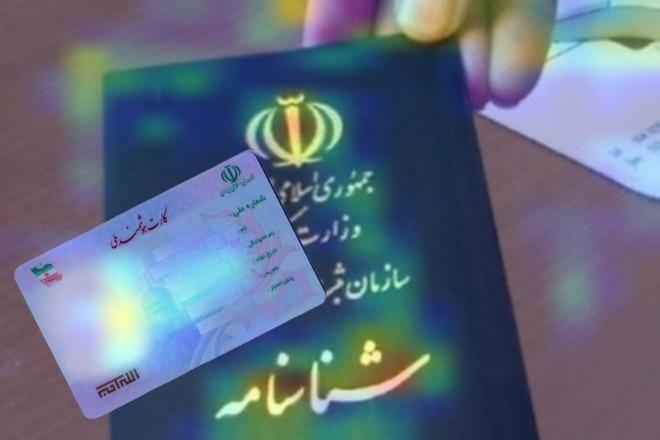

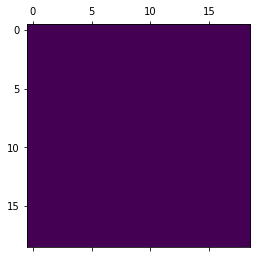

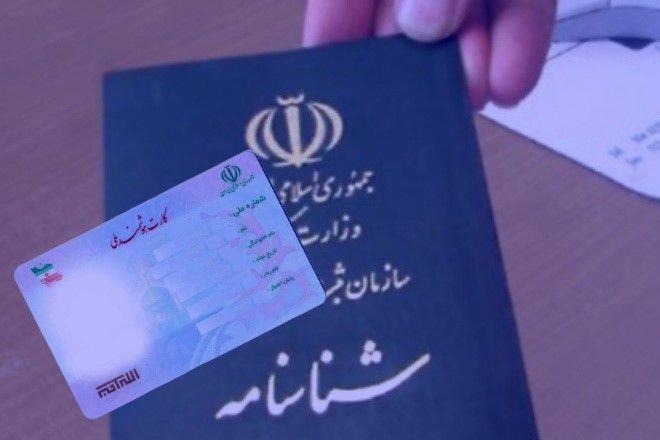

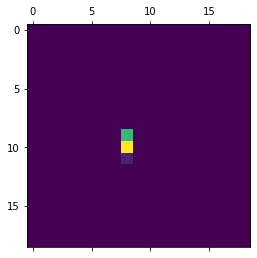

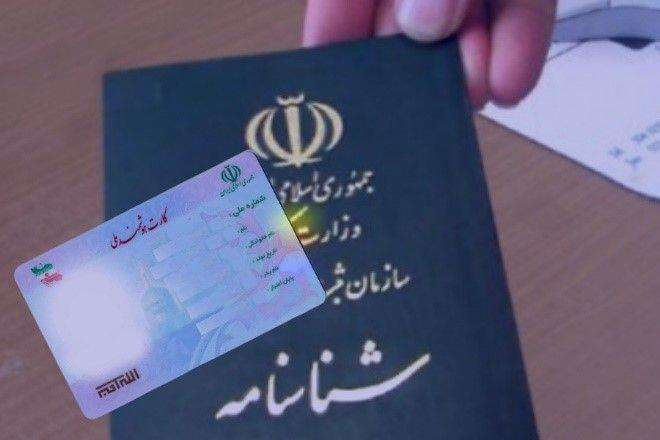

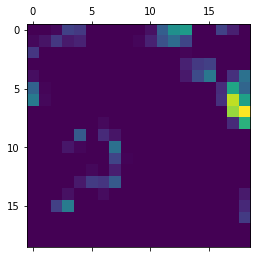

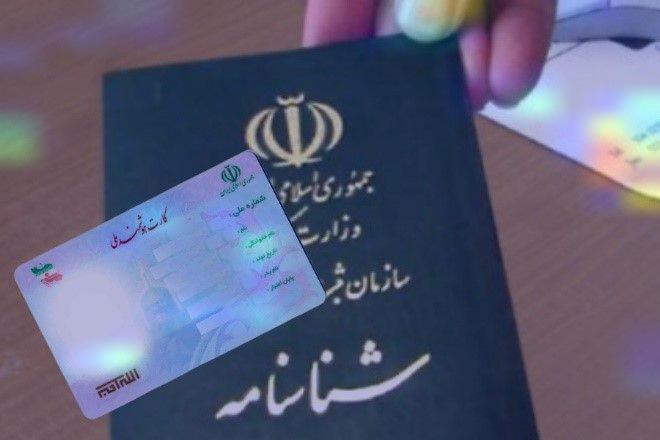

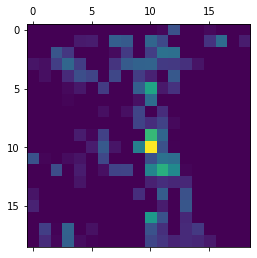

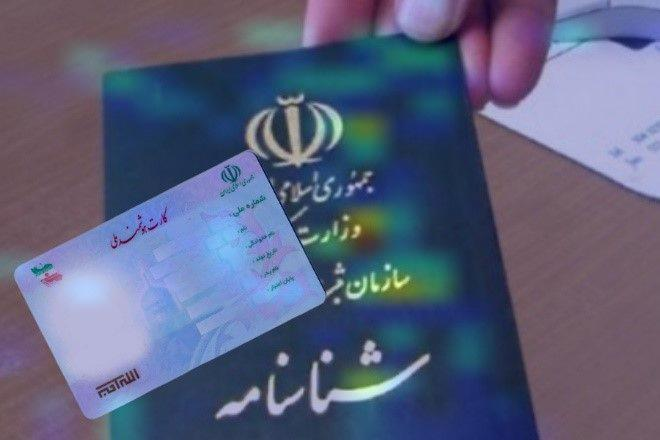

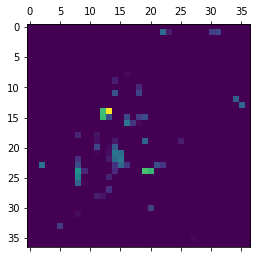

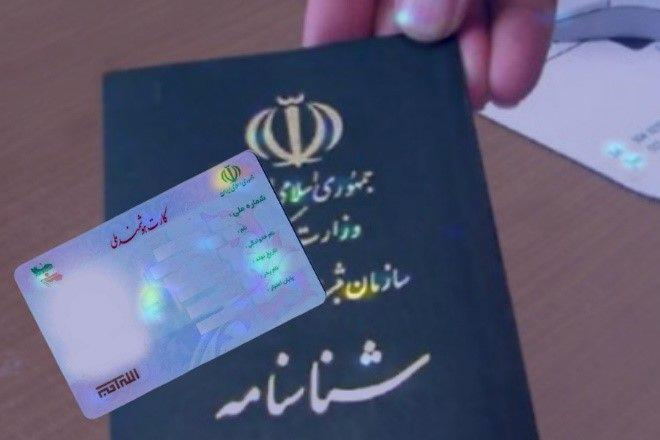

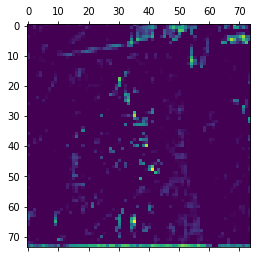

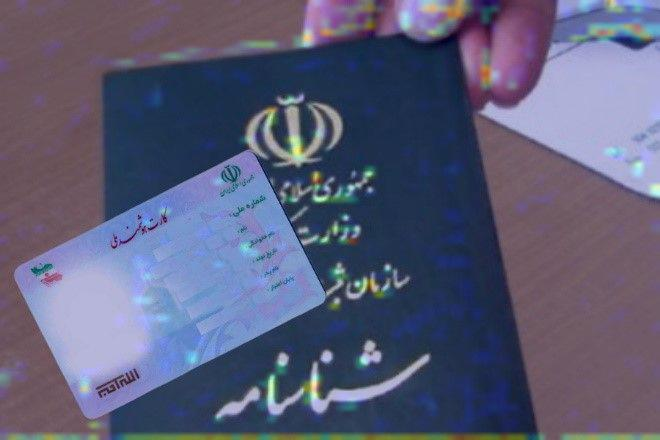

In [ ]:
# predict_samples(img_path)
display_gradcam_multiple(img_path, selected_conv)

Predicted: [[9.9997389e-01 6.3099993e-05 2.0009181e-06]]


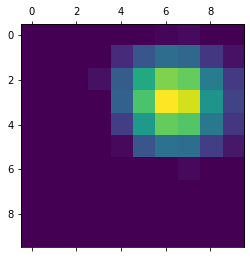

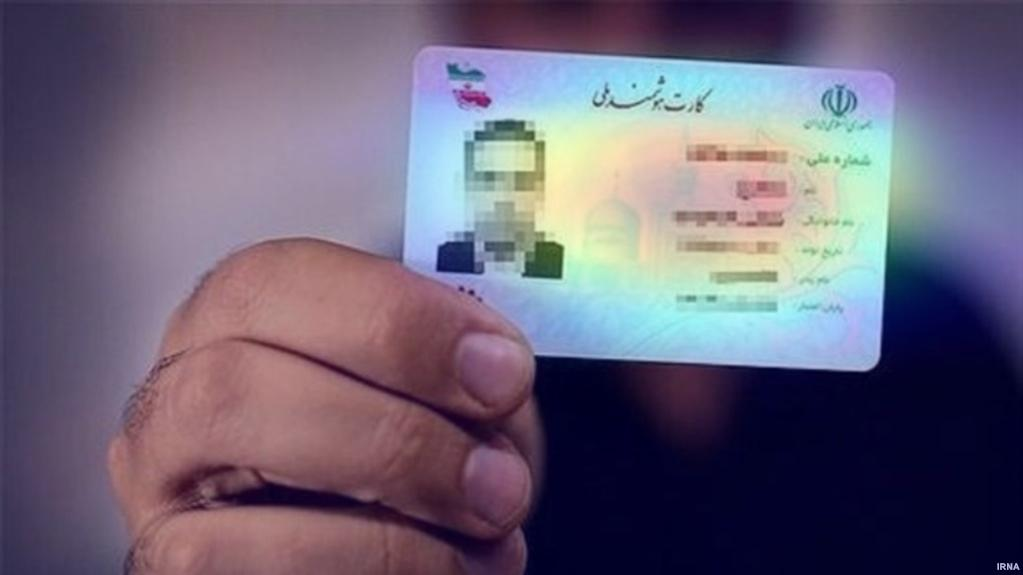

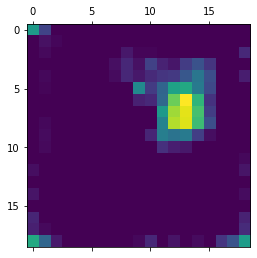

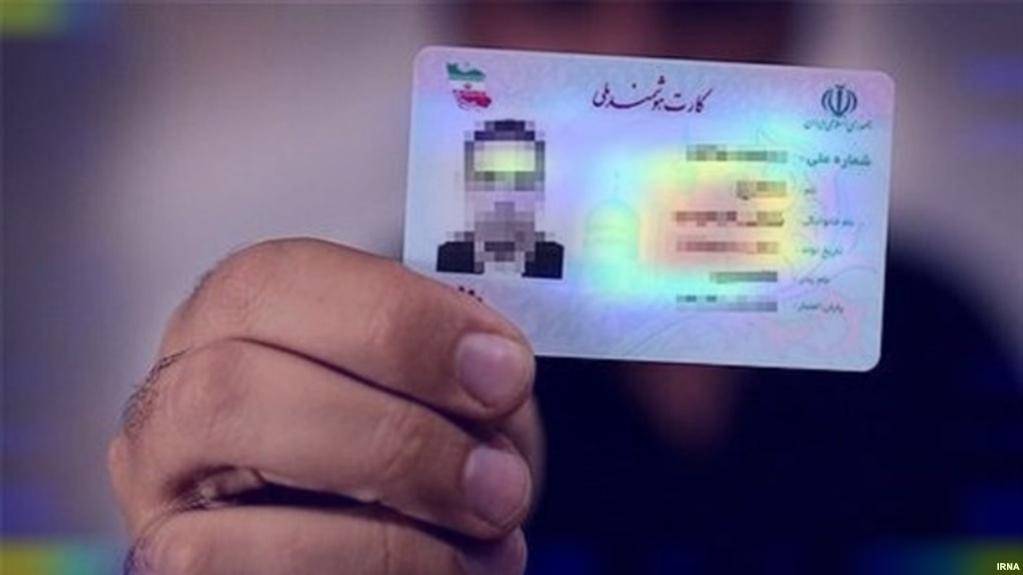

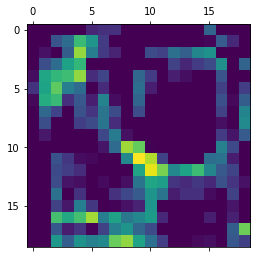

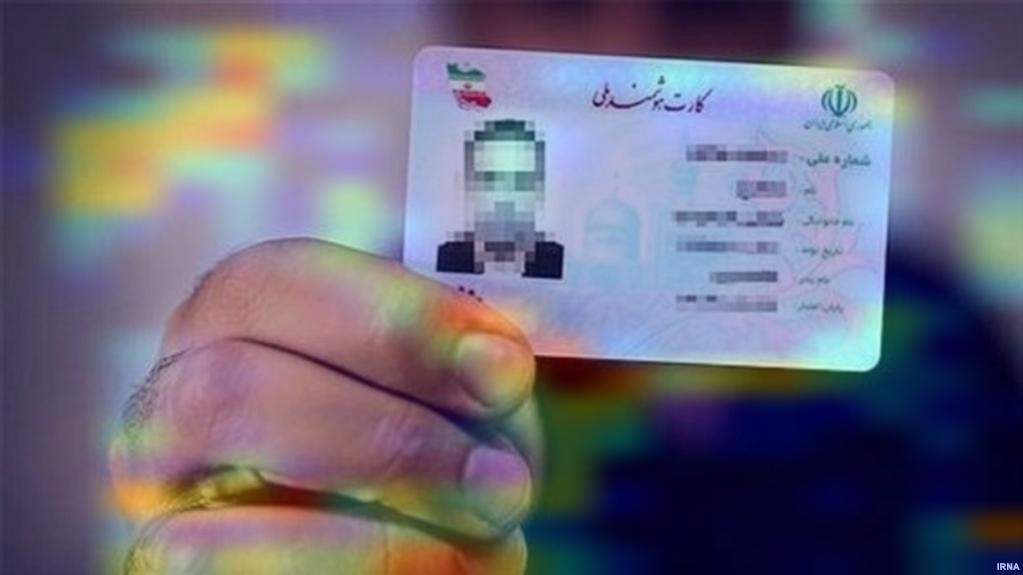

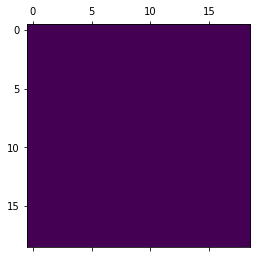

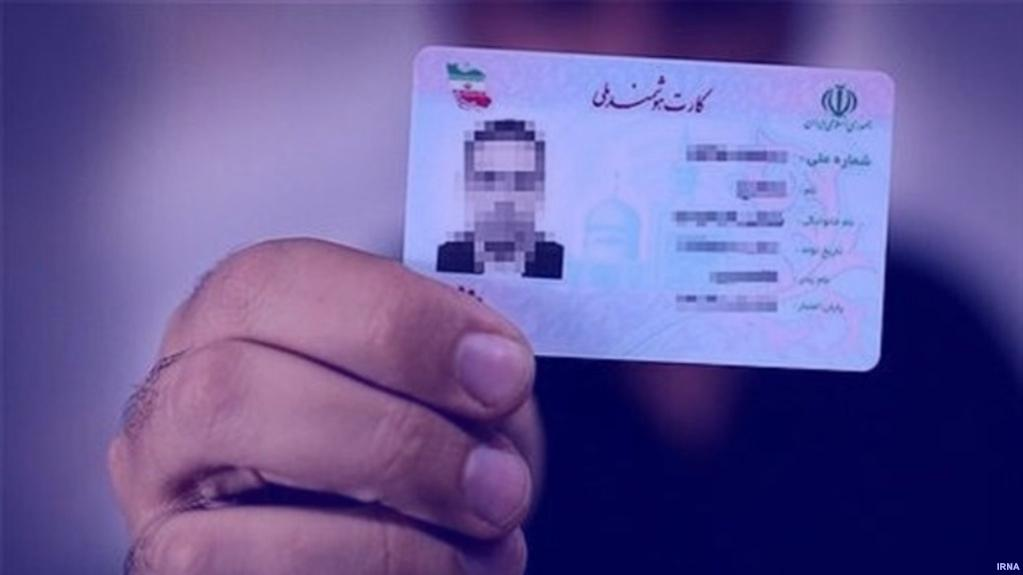

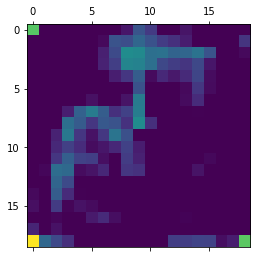

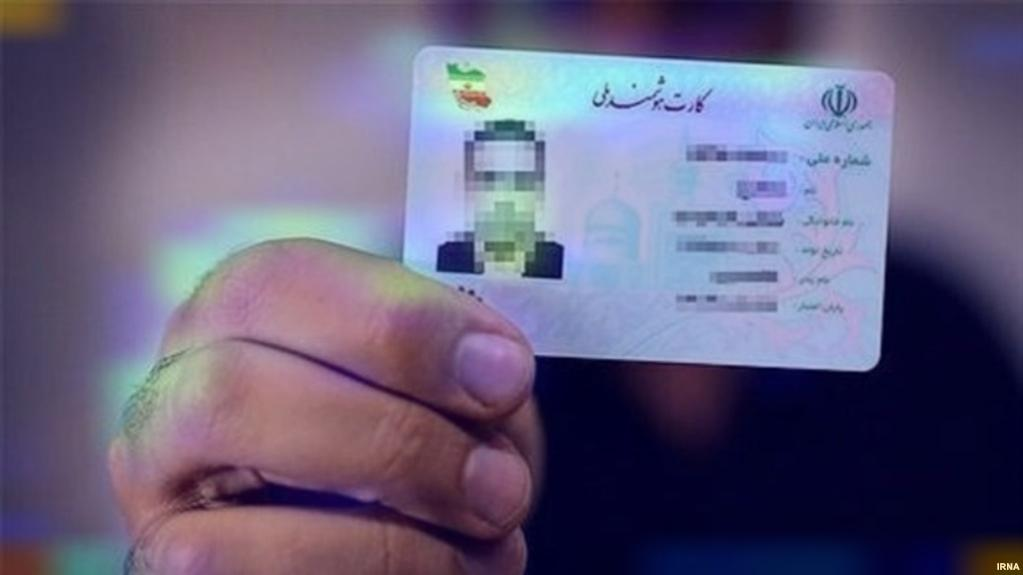

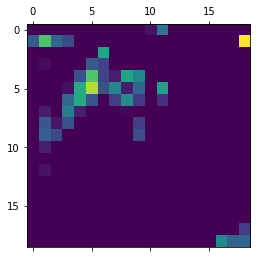

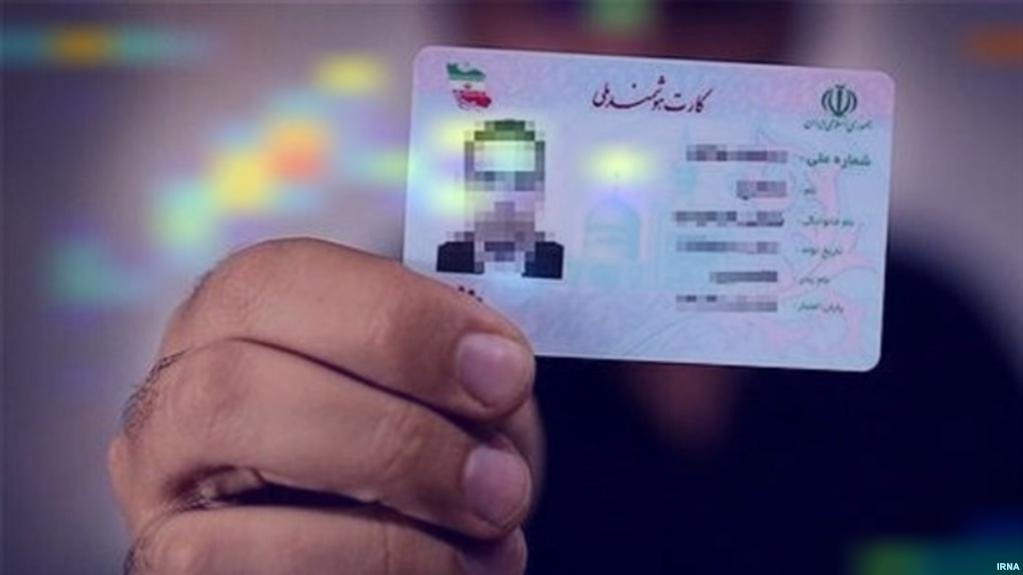

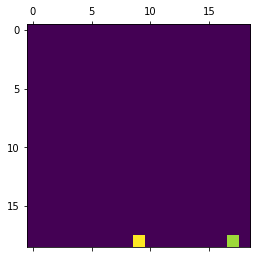

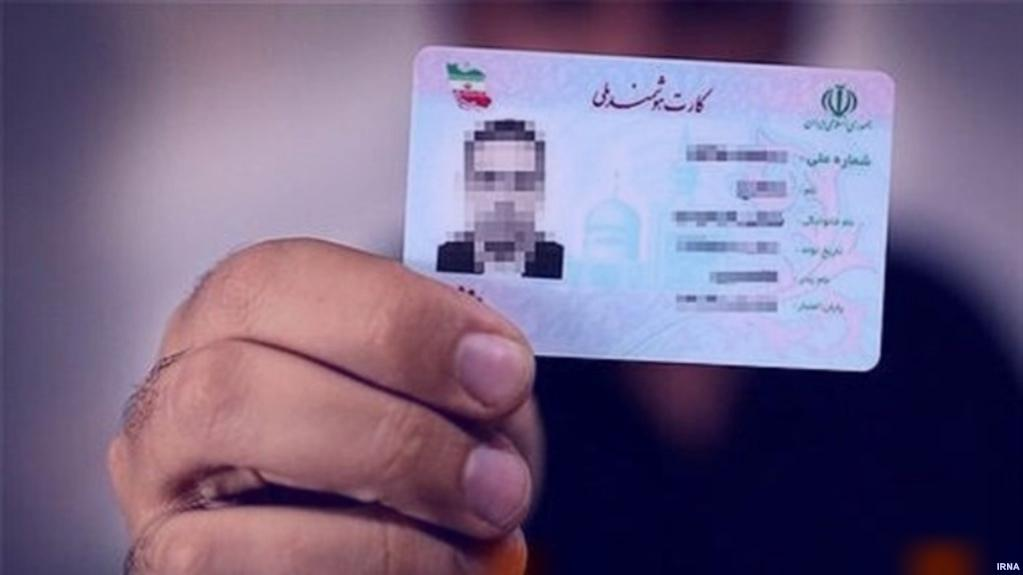

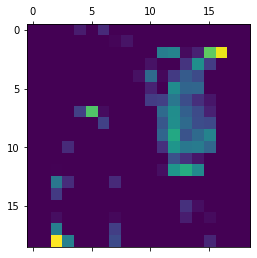

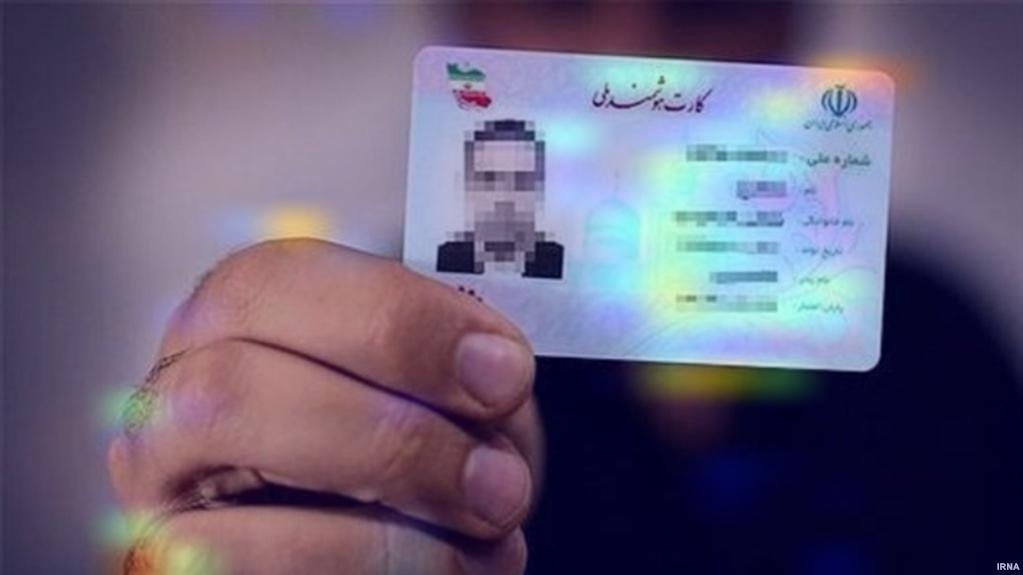

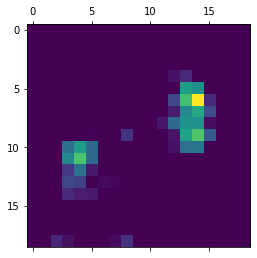

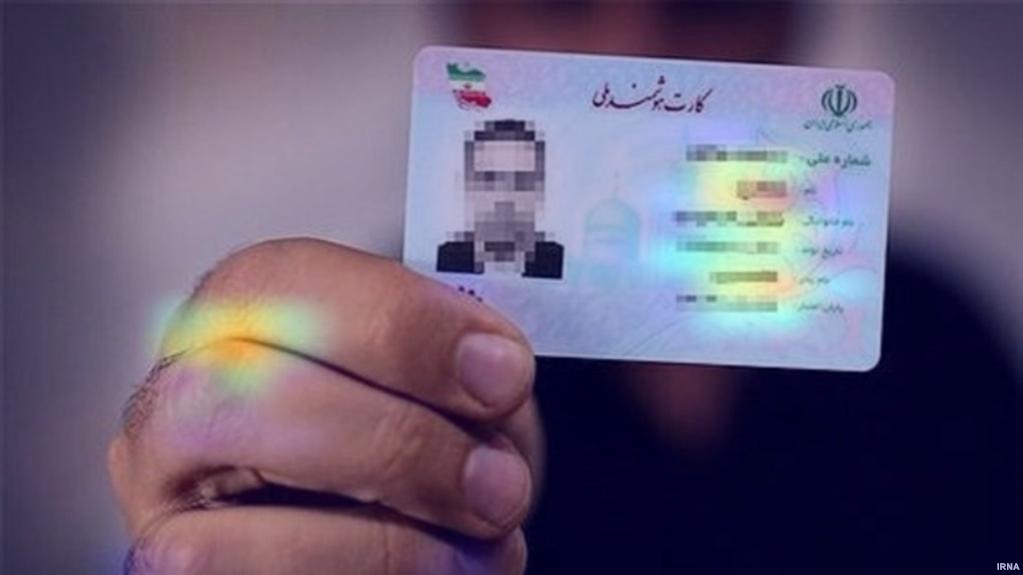

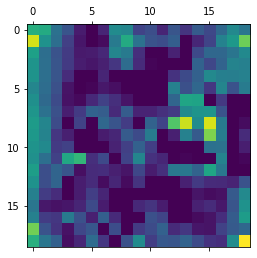

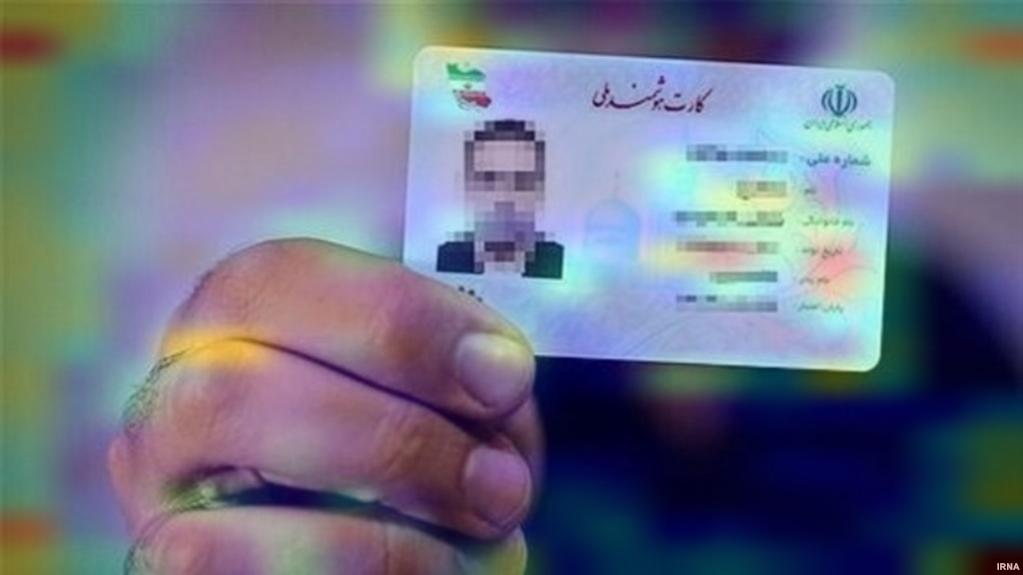

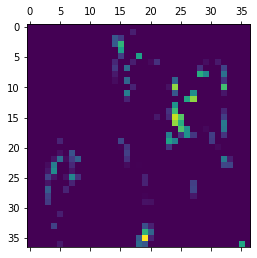

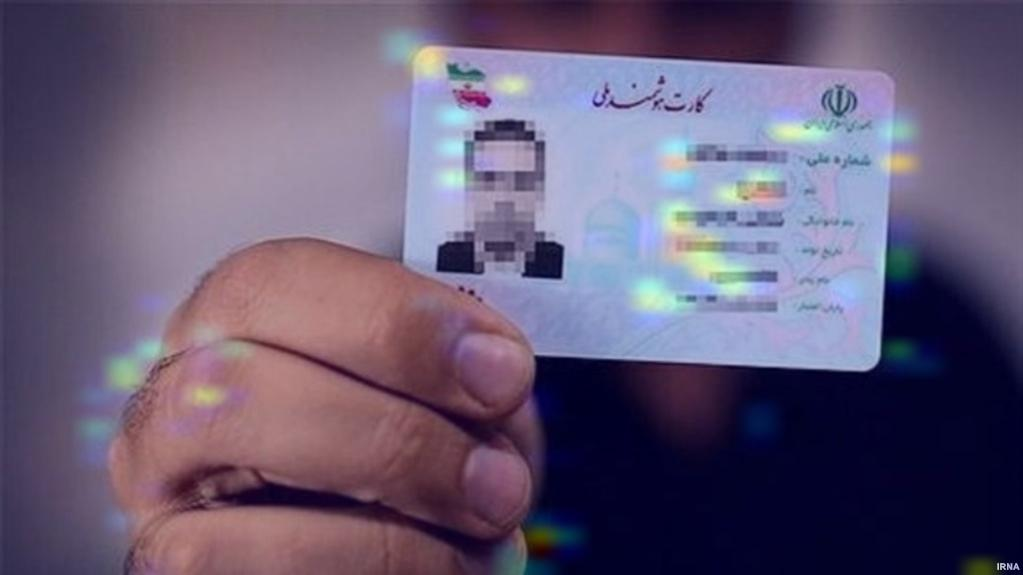

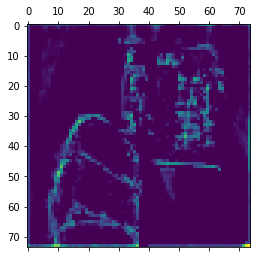

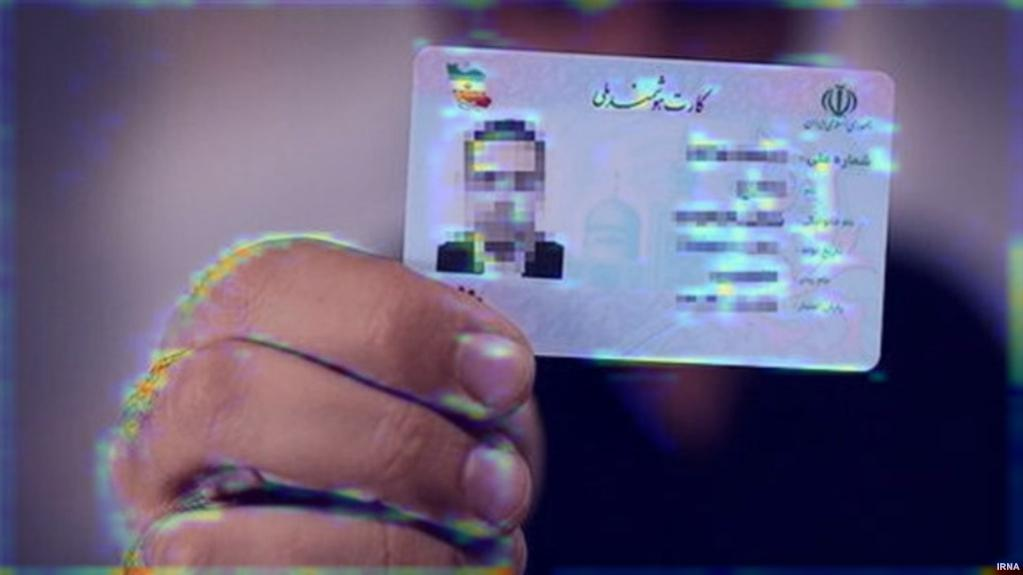

In [ ]:


img_path = keras.utils.get_file(
    "8754test.jpg", "https://gdb.rferl.org/EDFF2936-65DF-4E60-98D4-613A6DED7917_w1023_r1_s.jpg"
)


img_array = get_img_array(img_path, size=image_size) / 255.

# Make model  # Remove last layer's softmax
# model.layers[-1].activation = None

# Print what the top predicted class is
preds = model.predict(img_array)
print("Predicted:", preds)

display_gradcam_multiple(img_path, selected_conv)

Predicted: [[9.9983180e-01 4.0069027e-03 1.2895356e-11]]


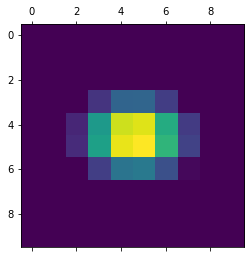

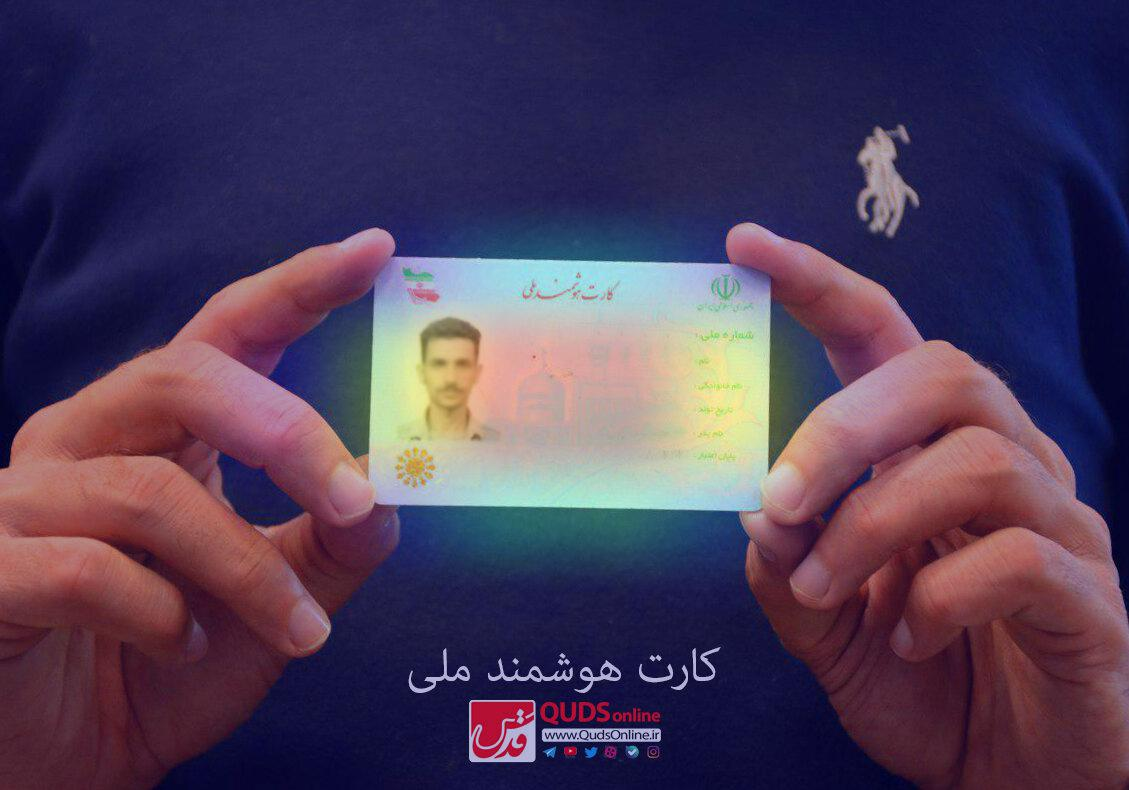

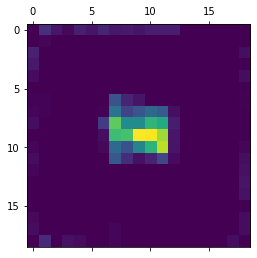

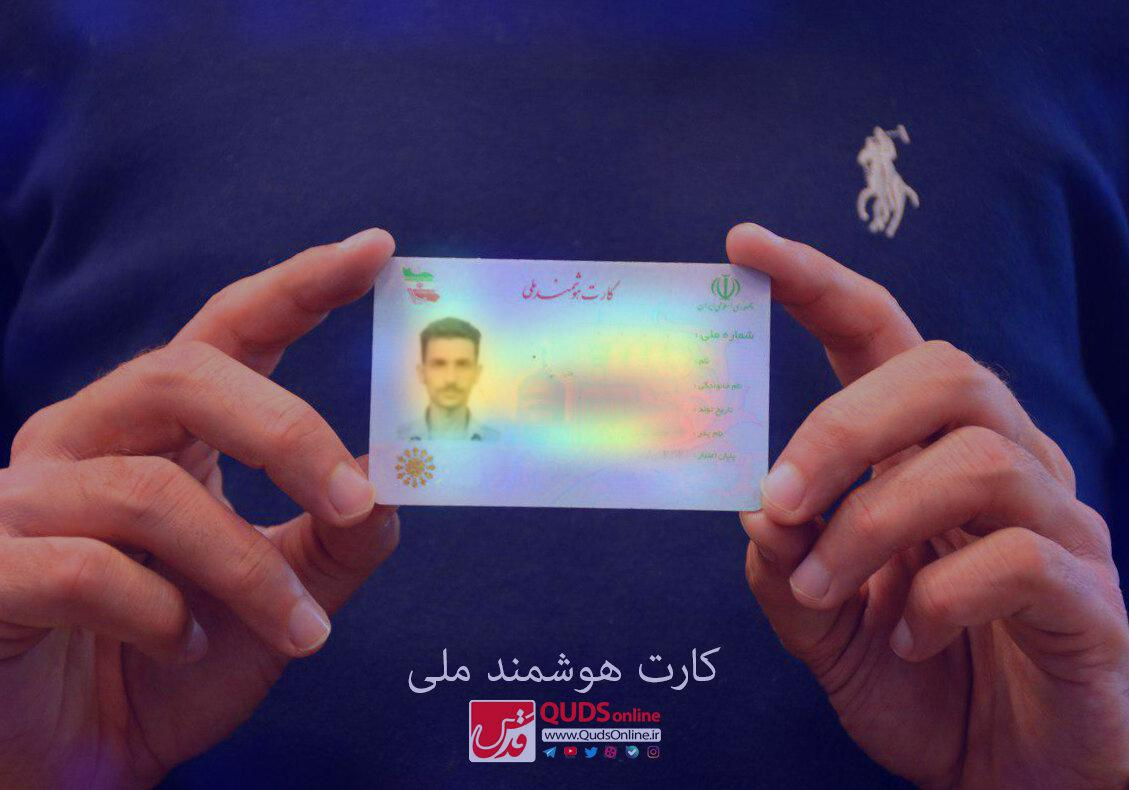

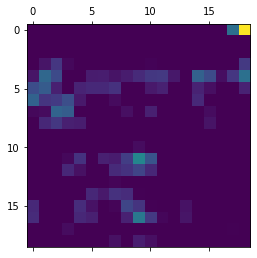

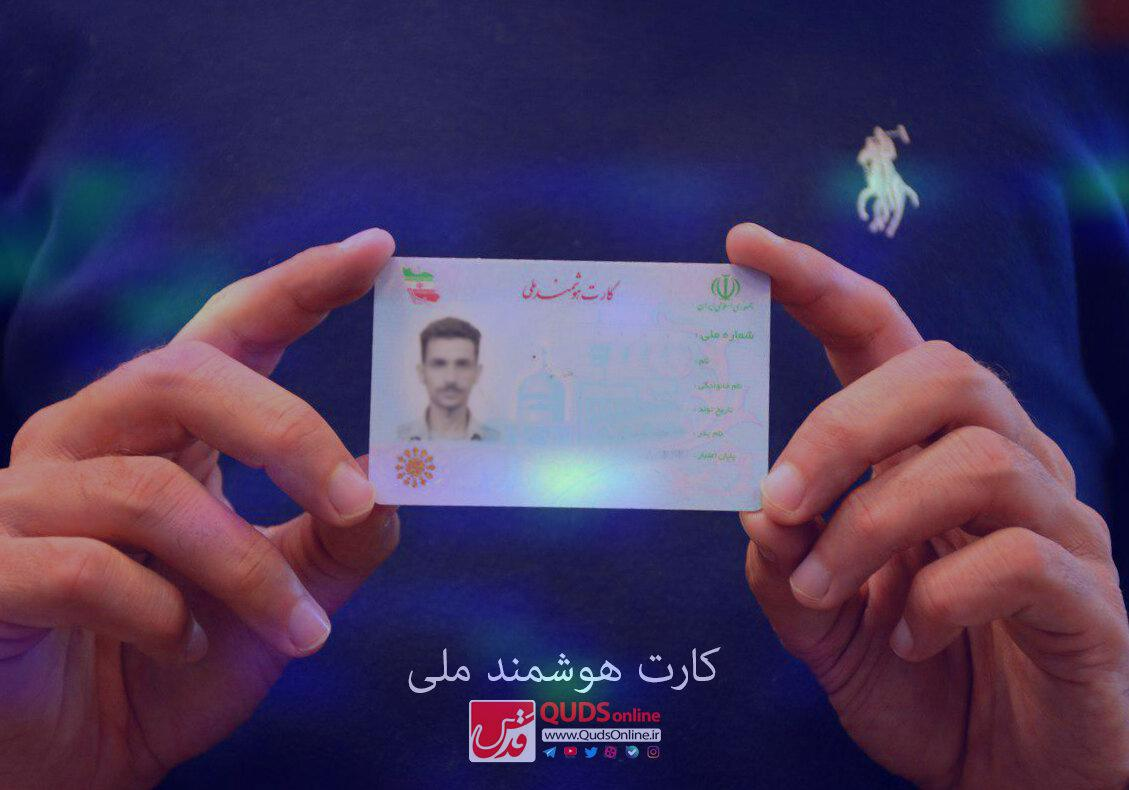

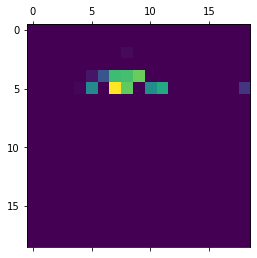

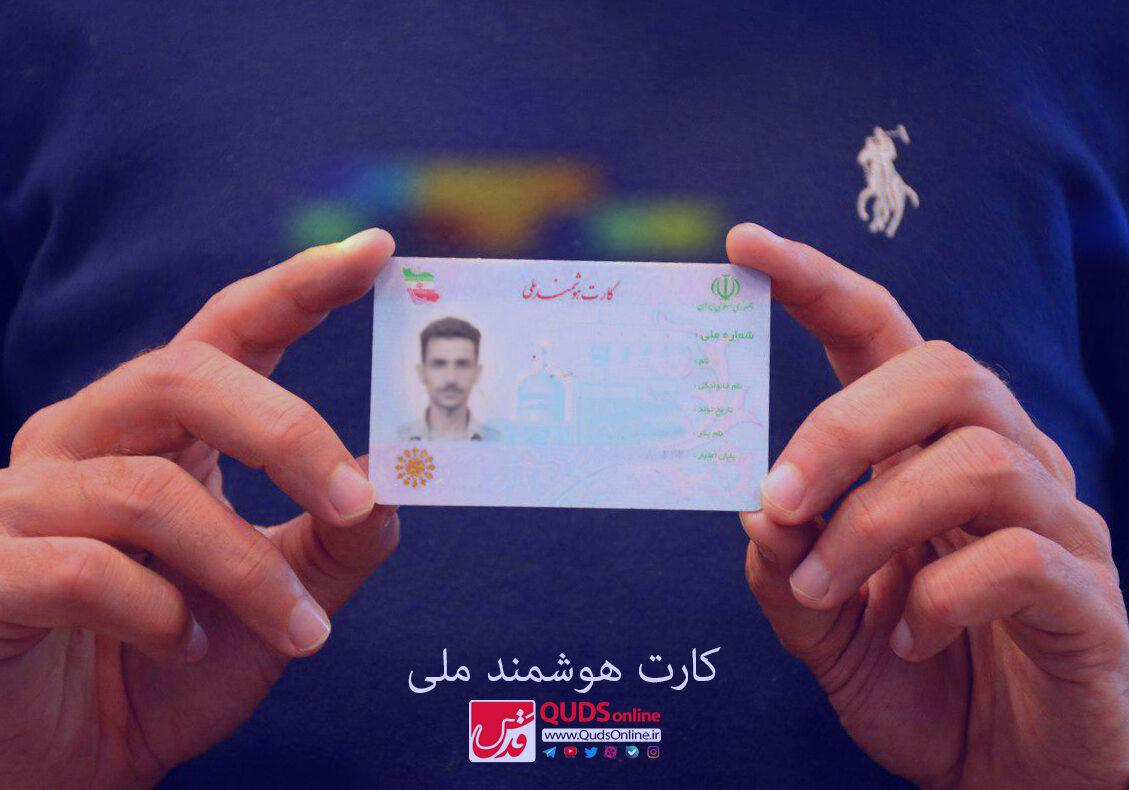

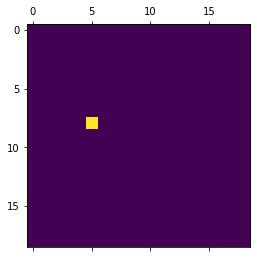

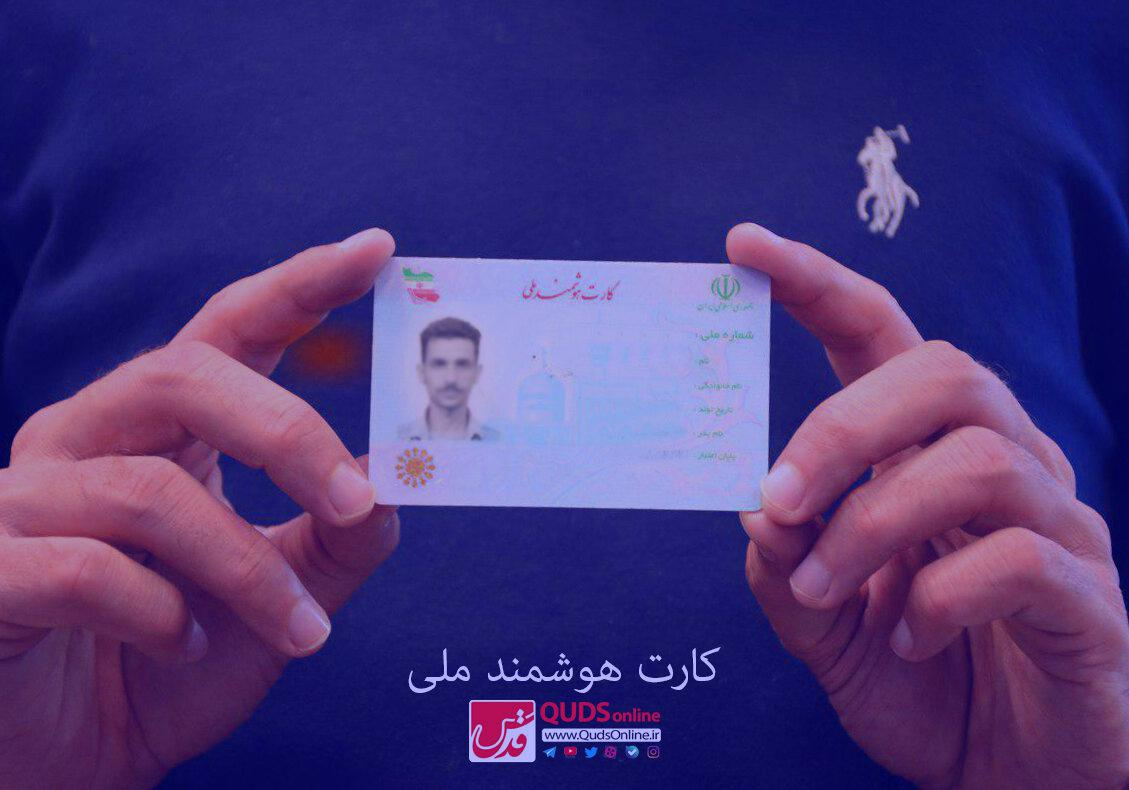

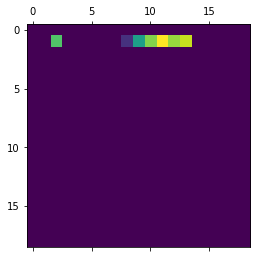

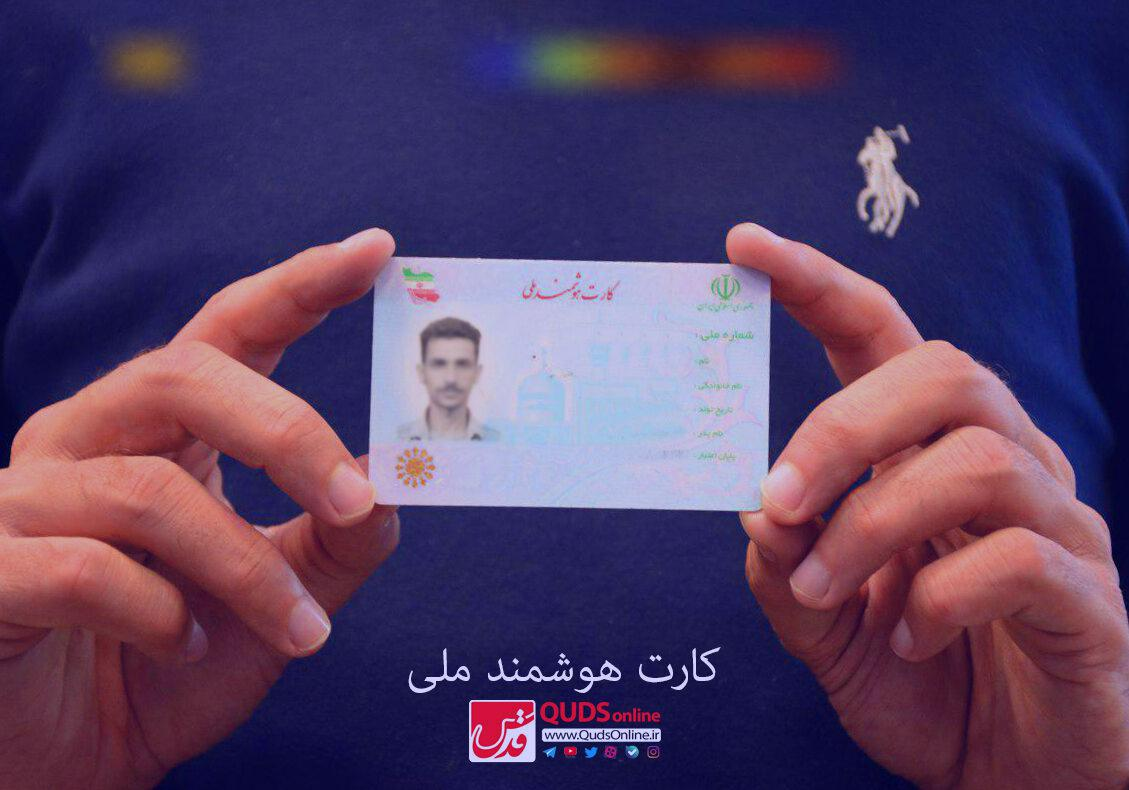

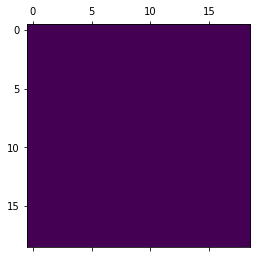

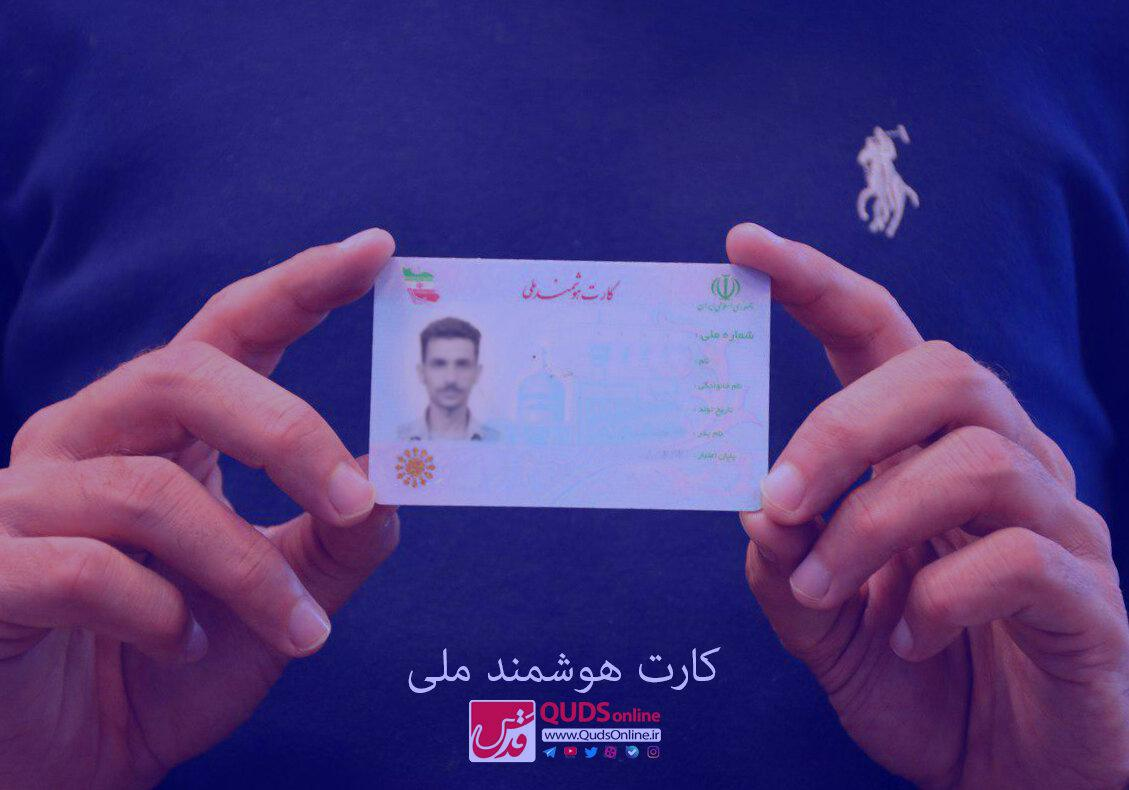

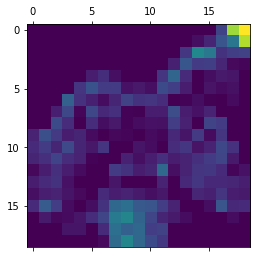

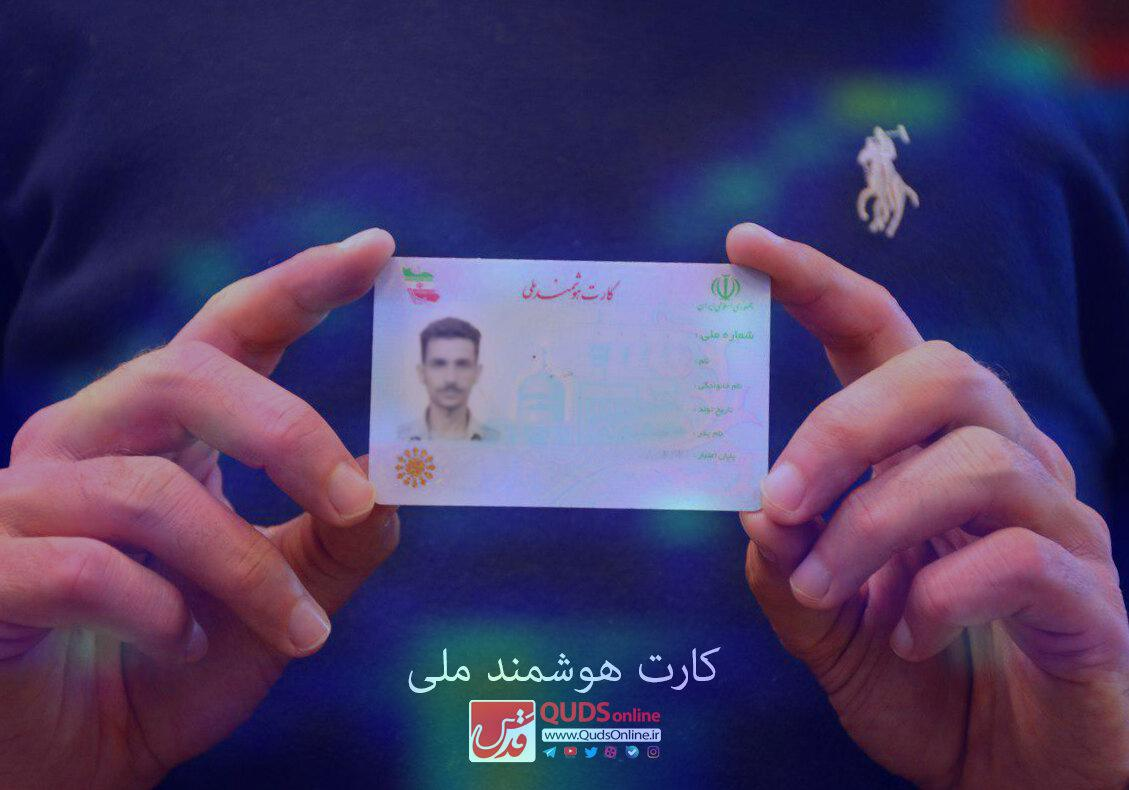

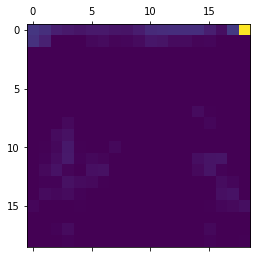

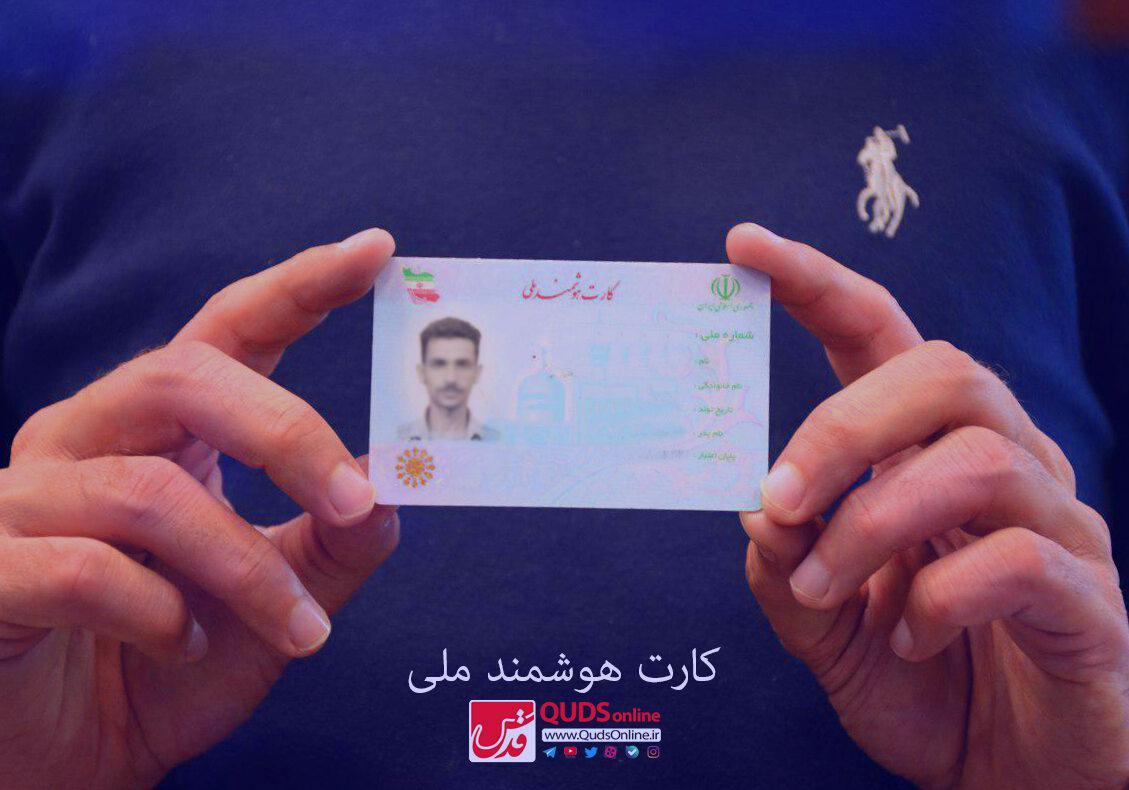

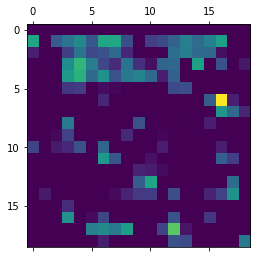

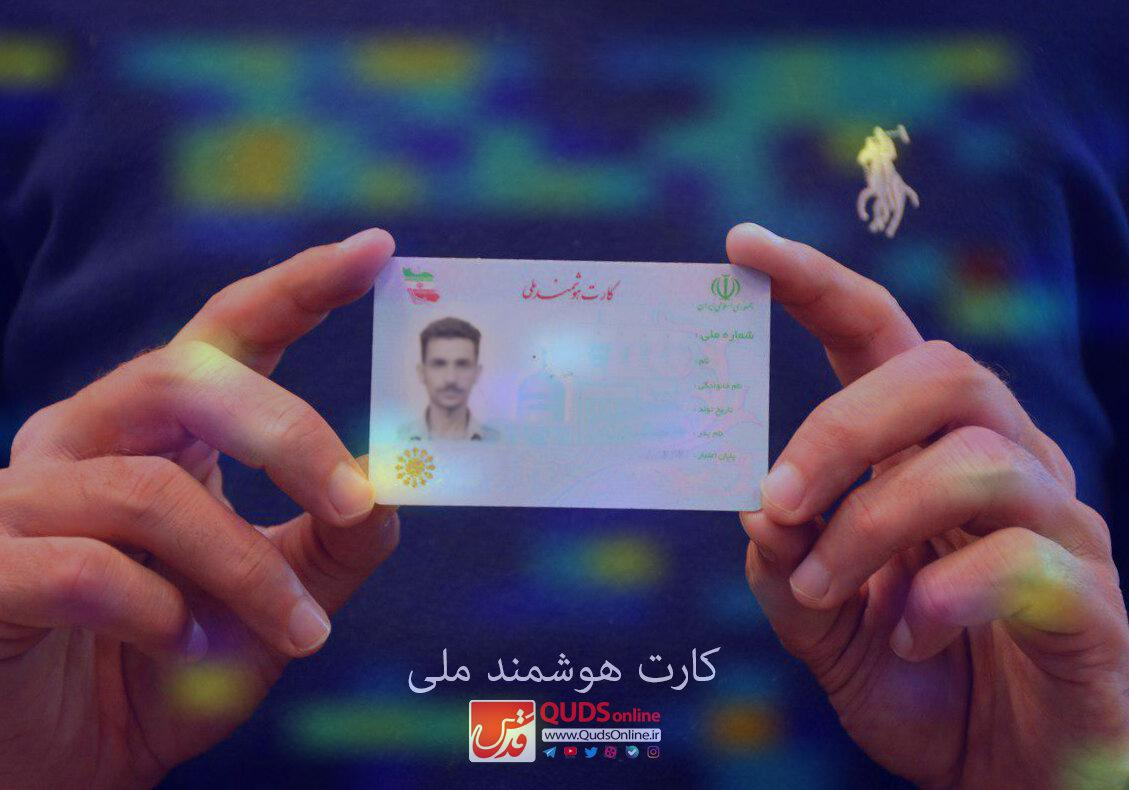

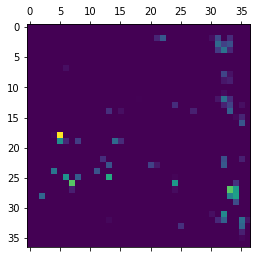

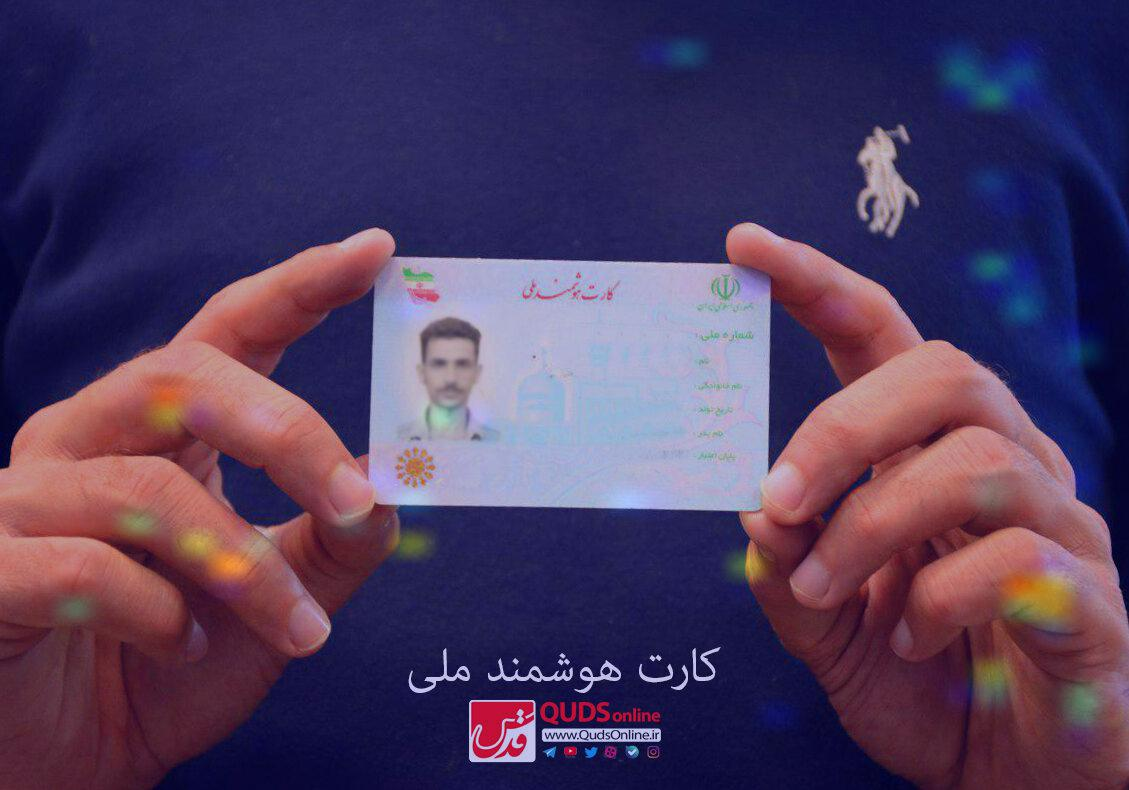

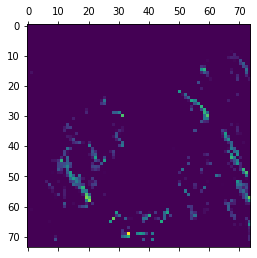

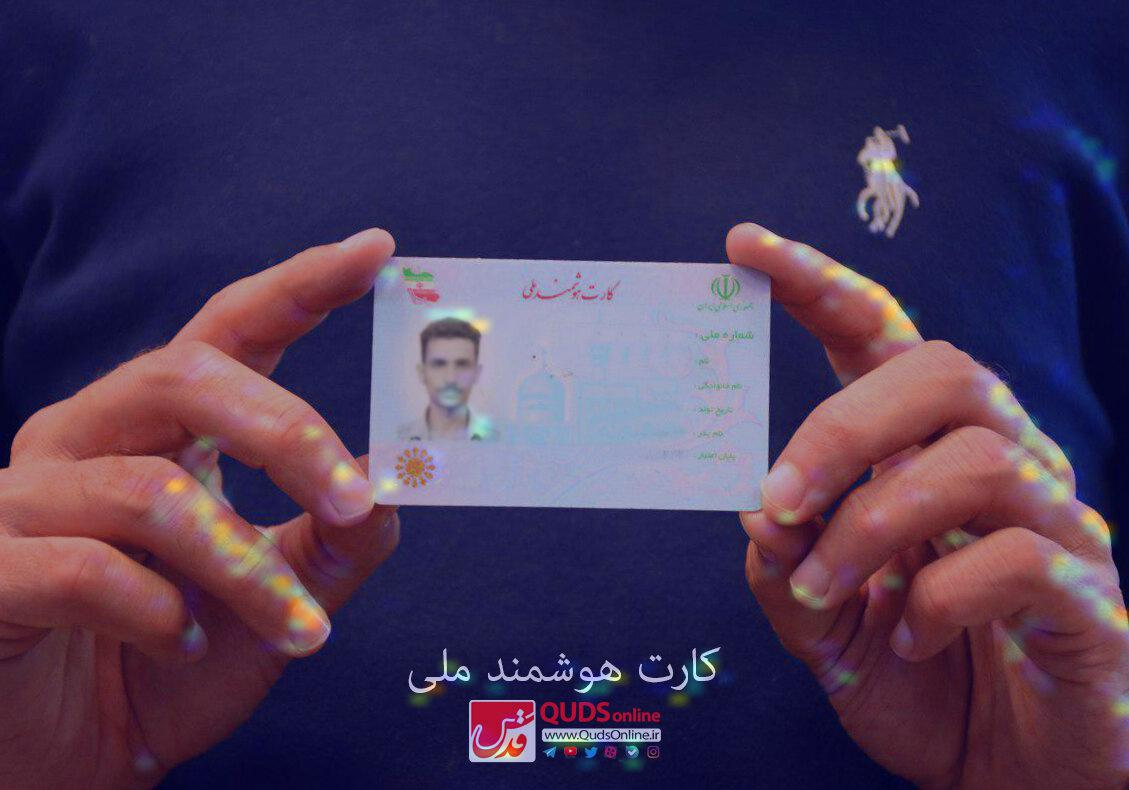

In [ ]:
img_path = keras.utils.get_file(
    "test0351.jpg", "https://i.ibb.co/zrZQ5gq/944103.jpg"
)


img_array = get_img_array(img_path, size=image_size) / 255.

# Make model  # Remove last layer's softmax
# model.layers[-1].activation = None

# Print what the top predicted class is
preds = model.predict(img_array)
print("Predicted:", preds)

display_gradcam_multiple(img_path, selected_conv)

Predicted: [[9.9999845e-01 1.9258125e-05 7.7505408e-10]]


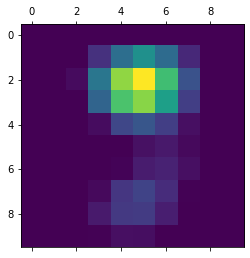

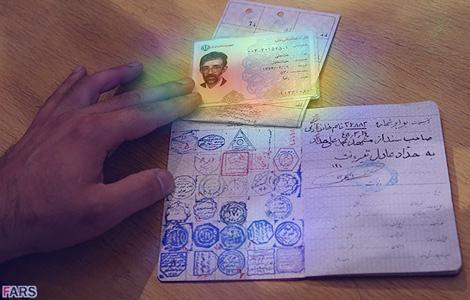

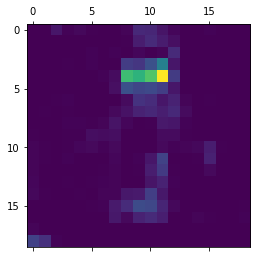

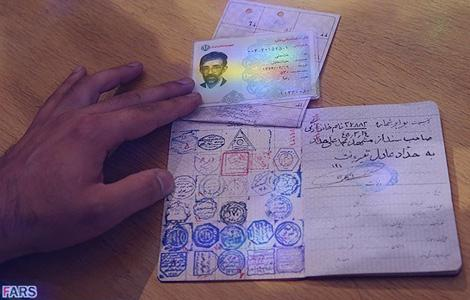

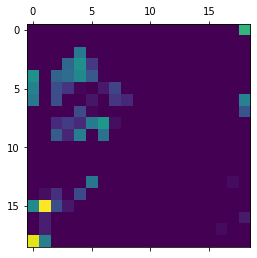

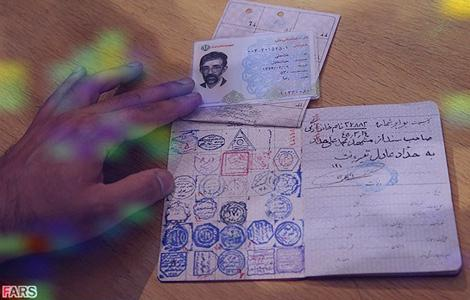

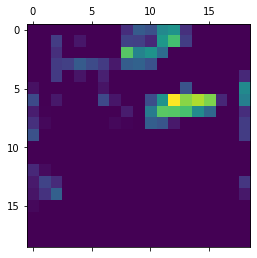

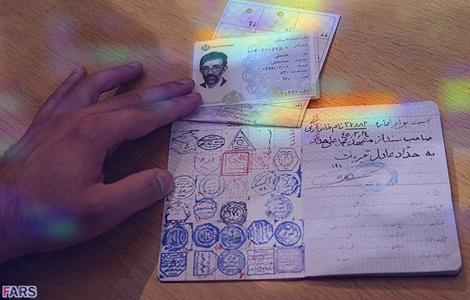

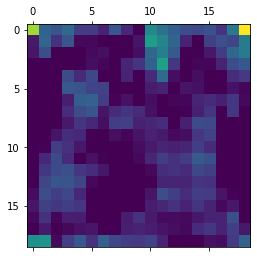

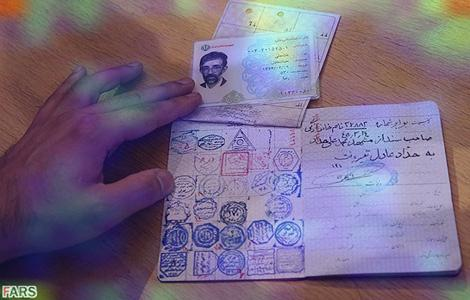

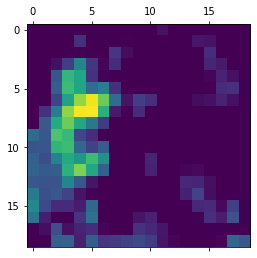

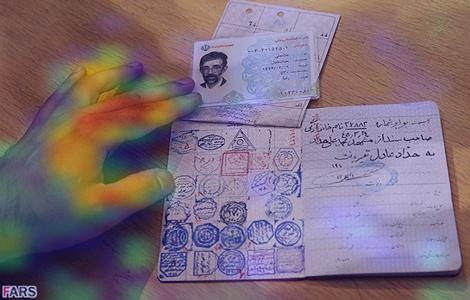

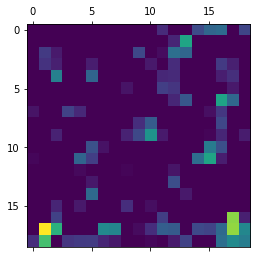

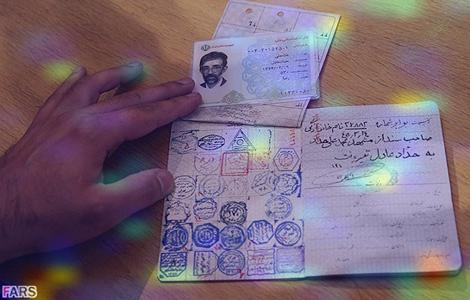

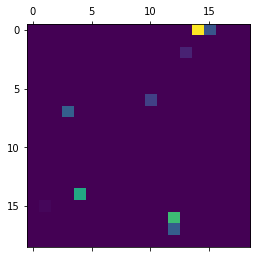

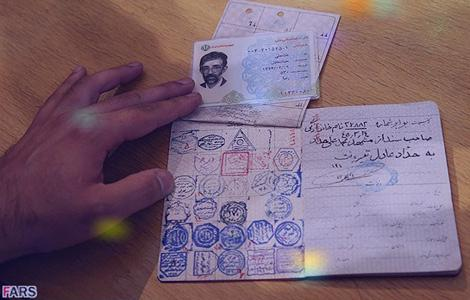

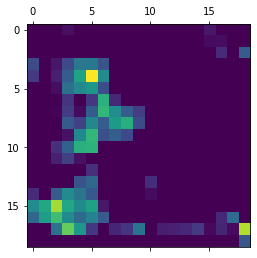

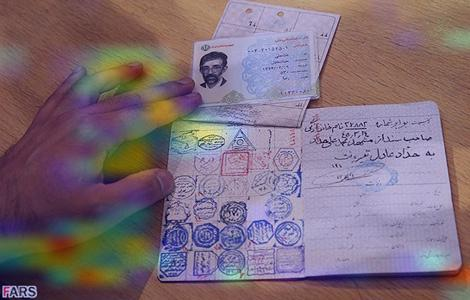

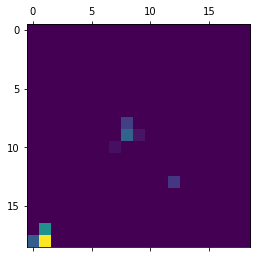

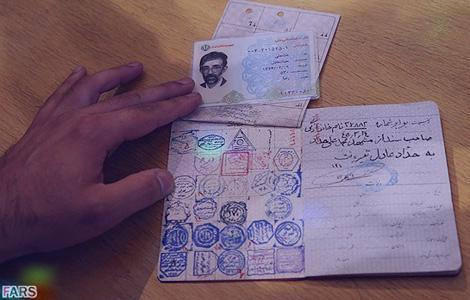

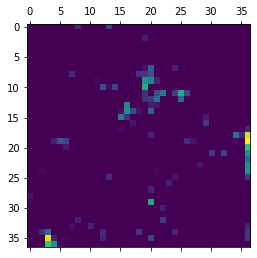

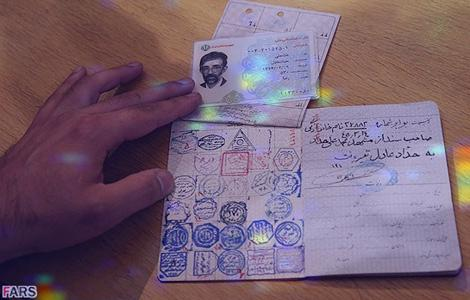

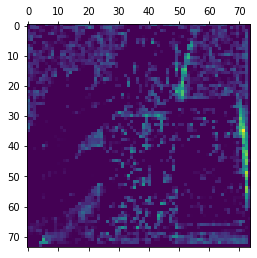

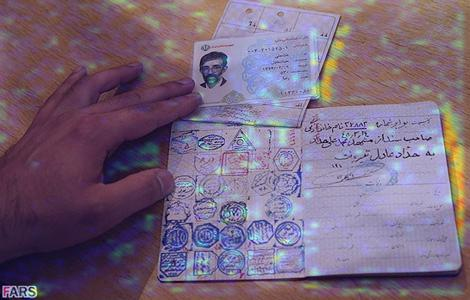

In [ ]:

img_path = keras.utils.get_file(
    "0554df.jpg", "https://i.ibb.co/P9FWHrP/43388-626.jpg"
)


img_array = get_img_array(img_path, size=image_size) / 255.

# Make model  # Remove last layer's softmax
# model.layers[-1].activation = None

# Print what the top predicted class is
preds = model.predict(img_array)
print("Predicted:", preds)

display_gradcam_multiple(img_path, selected_conv)

Predicted: [[9.9999928e-01 5.3396475e-06 2.1487701e-09]]


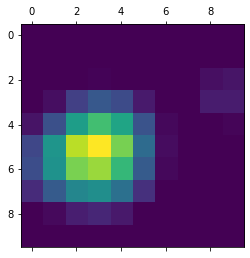

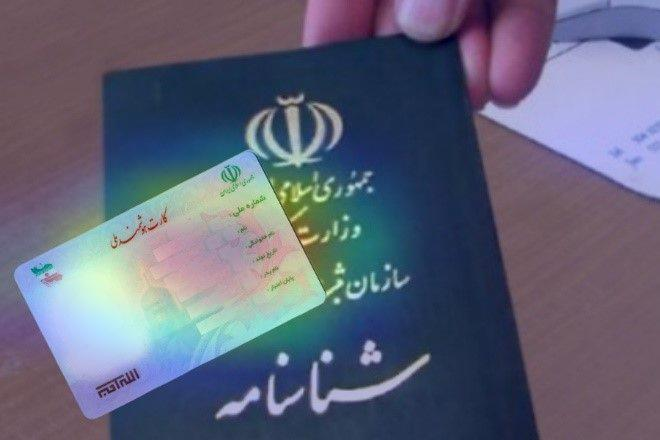

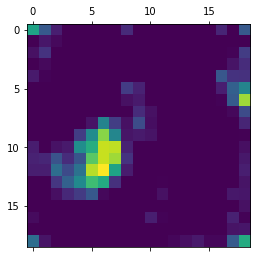

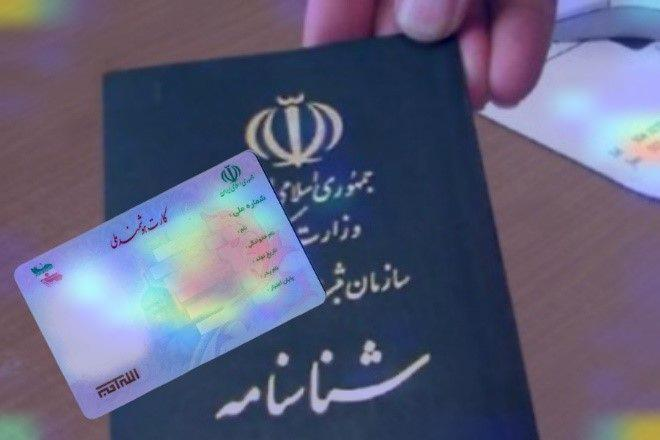

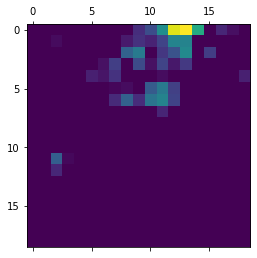

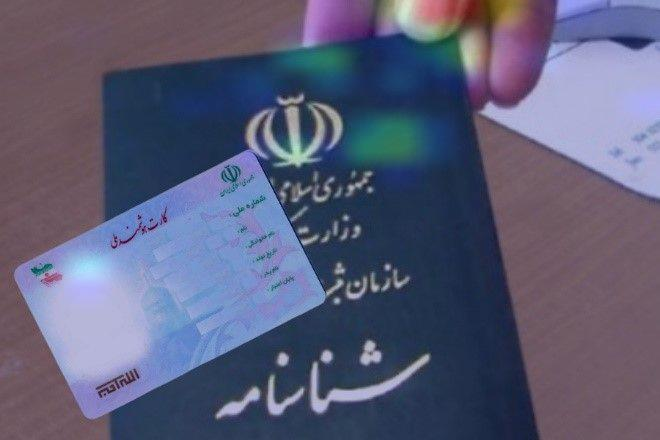

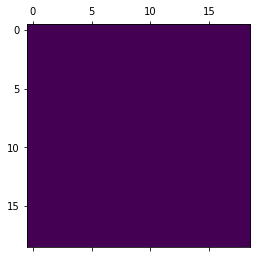

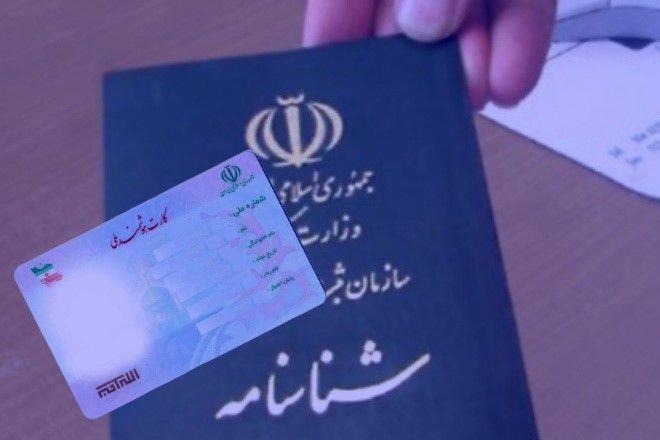

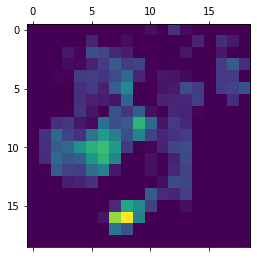

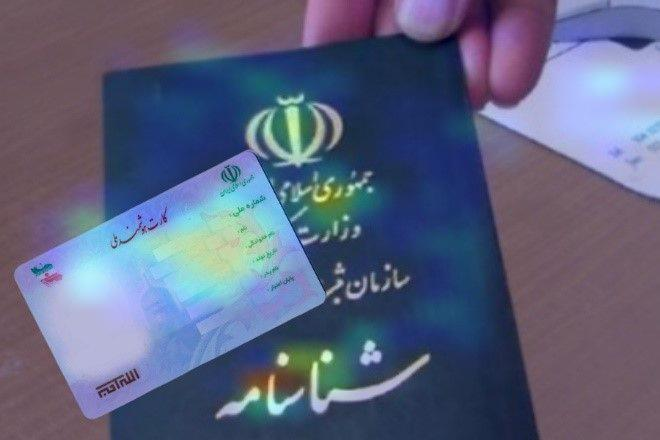

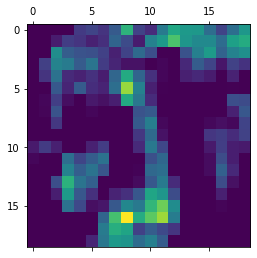

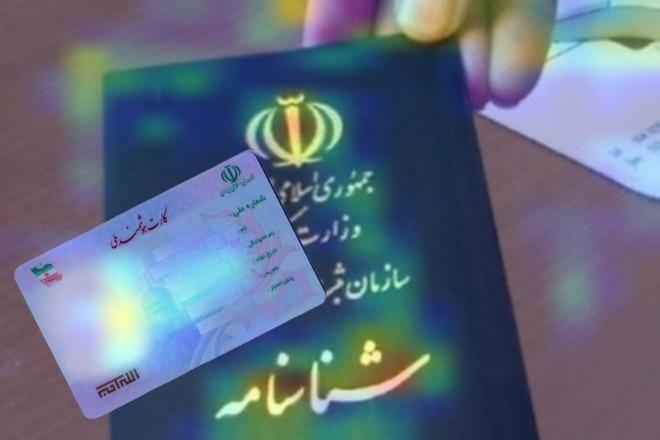

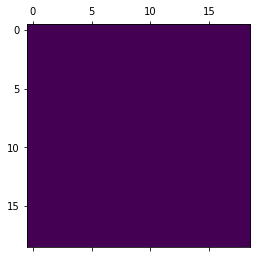

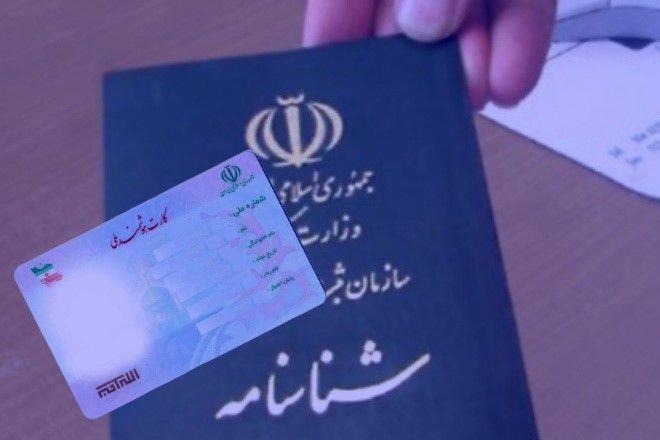

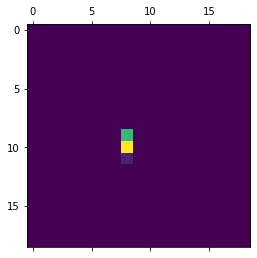

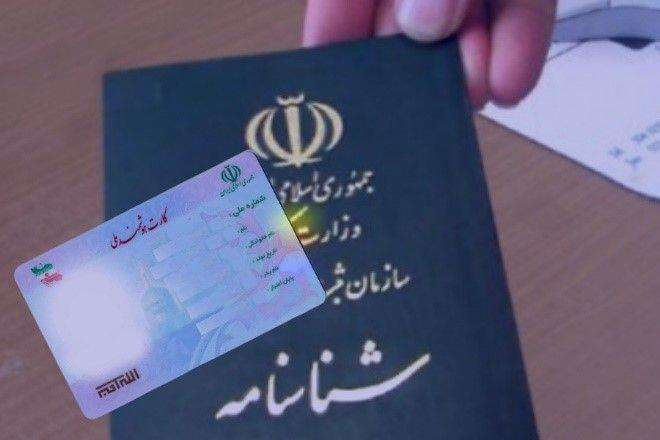

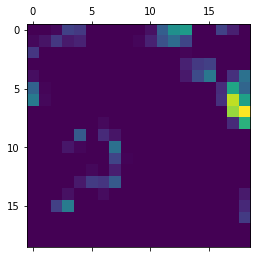

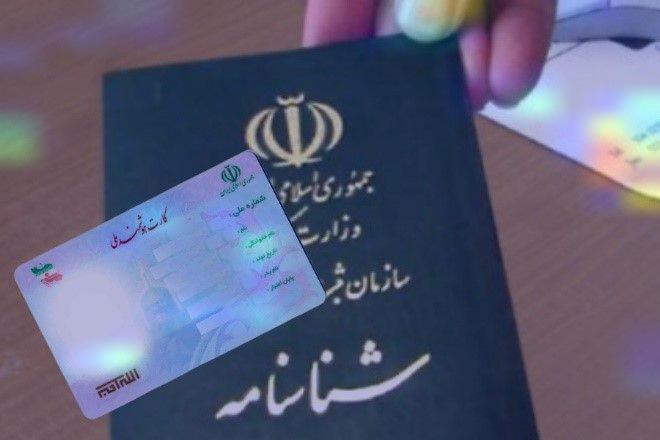

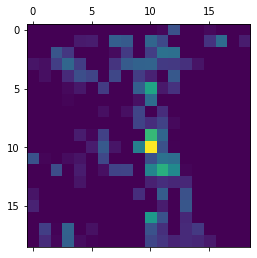

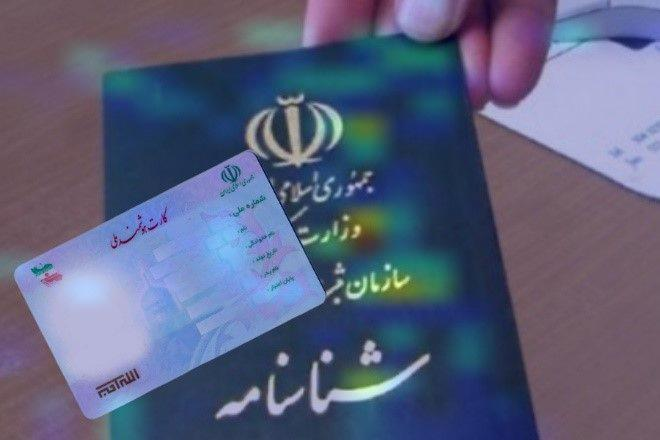

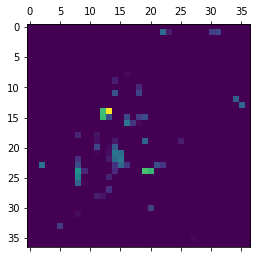

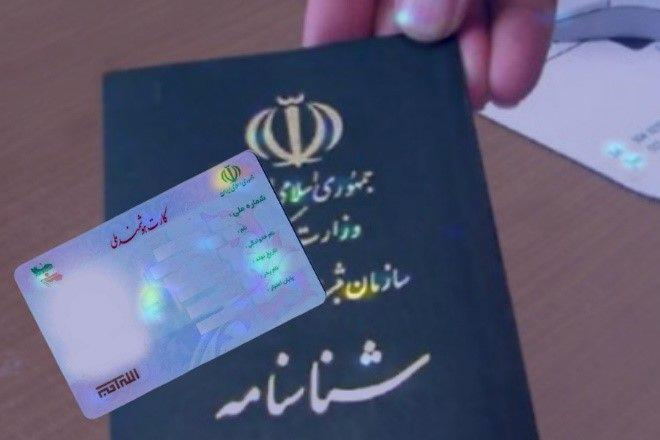

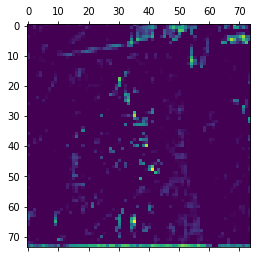

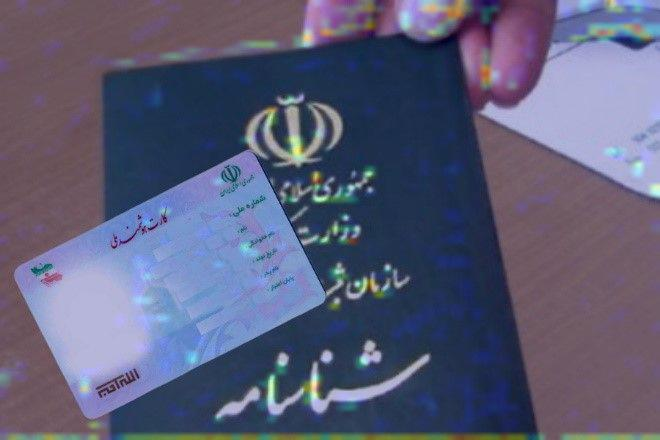

In [ ]:


img_path = keras.utils.get_file(
    "0546tyghddf.jpg", "https://i.ibb.co/jMRvnFF/317407-475.jpg"
)


img_array = get_img_array(img_path, size=image_size) / 255.

# Make model  # Remove last layer's softmax
# model.layers[-1].activation = None

# Print what the top predicted class is
preds = model.predict(img_array)
print("Predicted:", preds)

display_gradcam_multiple(img_path, selected_conv)

In [ ]:
model.save("/content/drive/MyDrive")


In [ ]:
conv_base.save("/content/drive/MyDrive")
